
# Linear Regression

> Linear modeling by the most elementary model : simple linear regression where a variable X is explained, modelled by an affine function of another variable y. Mostly used to predict **continuous value outputs**.


### First of all, what is linear ?

The term “linearity” in algebra refers to a **linear relationship between two or more variables**. If we draw this relationship in a two-dimensional space (between two variables), we get a straight line. In three dimensions it is a plane, and in more than three dimensions, a hyperplane.

In this example, we will use Scikit-Learn which is a Python machine learning library.

### Goal

* Y the real random variable to be explained (endogenous, dependent or response variable)
* X the expanatory variable or fixed effect (exogenous). 
* We assume that, on average, E(Y), is an affine function of X. Writing the model implicitly assumes a prior notion of causality in the sense that Y depends on X because the model is not symmetrical.

We want to predict a **dependent variable value** (y) based on a **given independent variable** (x). So, this regression technique finds out a linear relationship between x (input) and y(output). By ploting variables, linear regression gives us a straight line that **best fits the data points**.

### So, what does the linear regression algorithm ?

It gives us the most optimal value for the intercept and the slope. Y and X can't be changed since they are fixed data. The only values that we can control are **b and m**.
The algorithm check for the line with the least error, that fits the most **data points**.

___

## I - Simple linear regression

#### Basic linear equation : 
$Y = mx + b$ 
* $b$ : intercept
* $m$ : slope

In [153]:
## Data from : https://www.kaggle.com/dronio/SolarEnergy?select=SolarPrediction.csv

In [154]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [155]:
dataset = pd.read_csv('/Users/Laurine/Documents/Python Scripts/IMAC2/Learn-computer-graphics/Linear-Regression/SolarPrediction.csv')

In [156]:
## See data
dataset.describe()

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
count,3.268600e+04,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000
mean,1.478047e+09,207.124697,51.103255,30.422879,75.016307,143.489821,6.243869
std,3.005037e+06,315.916387,6.201157,0.054673,25.990219,83.167500,3.490474
min,1.472724e+09,1.110000,34.000000,30.190000,8.000000,0.090000,0.000000
25%,1.475546e+09,1.230000,46.000000,30.400000,56.000000,82.227500,3.370000
50%,1.478026e+09,2.660000,50.000000,30.430000,85.000000,147.700000,5.620000
75%,1.480480e+09,354.235000,55.000000,30.460000,97.000000,179.310000,7.870000
max,1.483265e+09,1601.260000,71.000000,30.560000,103.000000,359.950000,40.500000


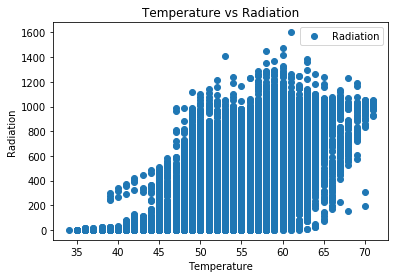

In [157]:
##  predict the maximum temperature taking input feature as the radiation.

dataset.plot(x='Temperature', y='Radiation', style='o')  
plt.title('Temperature vs Radiation')  
plt.xlabel('Temperature')  
plt.ylabel('Radiation')  
plt.show()

C:\Users\Laurine\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


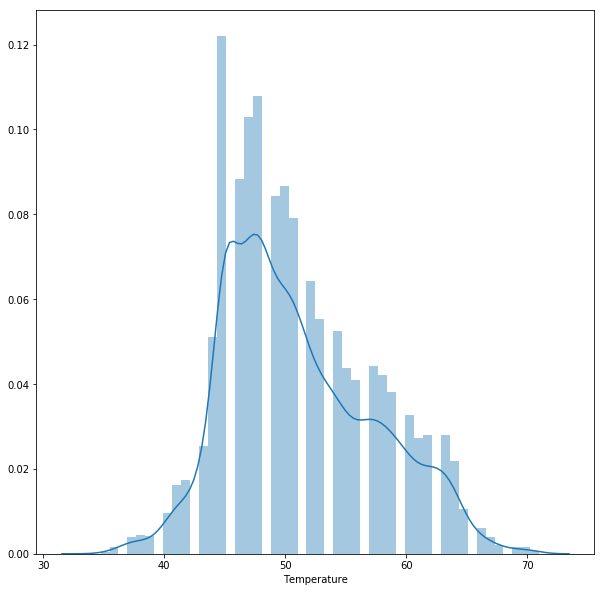

In [158]:
## We need to check the average temperature : we see that it is around 45 - 50

plt.figure(figsize=(10,10))
plt.tight_layout()
seabornInstance.distplot(dataset['Temperature'])

In [159]:
## We need to divide the data into attributes (independant variables) and labels (dependant variables). Labels are values we want to predict
## Here, our attribute is "radiation" and our label is "temperature"

X = dataset['Radiation'].values.reshape(-1,1)
y = dataset['Temperature'].values.reshape(-1,1)

In [160]:
## We need to split the data between the training and the test set. Let say we give 70% of the data to the training set and 30 % to the test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [161]:
## It is time to traing our algorithm ! 

regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [162]:
## We found the best value for the intercept (b) and the slope (m)

#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

[48.12878042]
[[0.01442639]]


In [163]:
## Time to make prediction ! (we need to use the test dataset and compare it to actual data)

y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

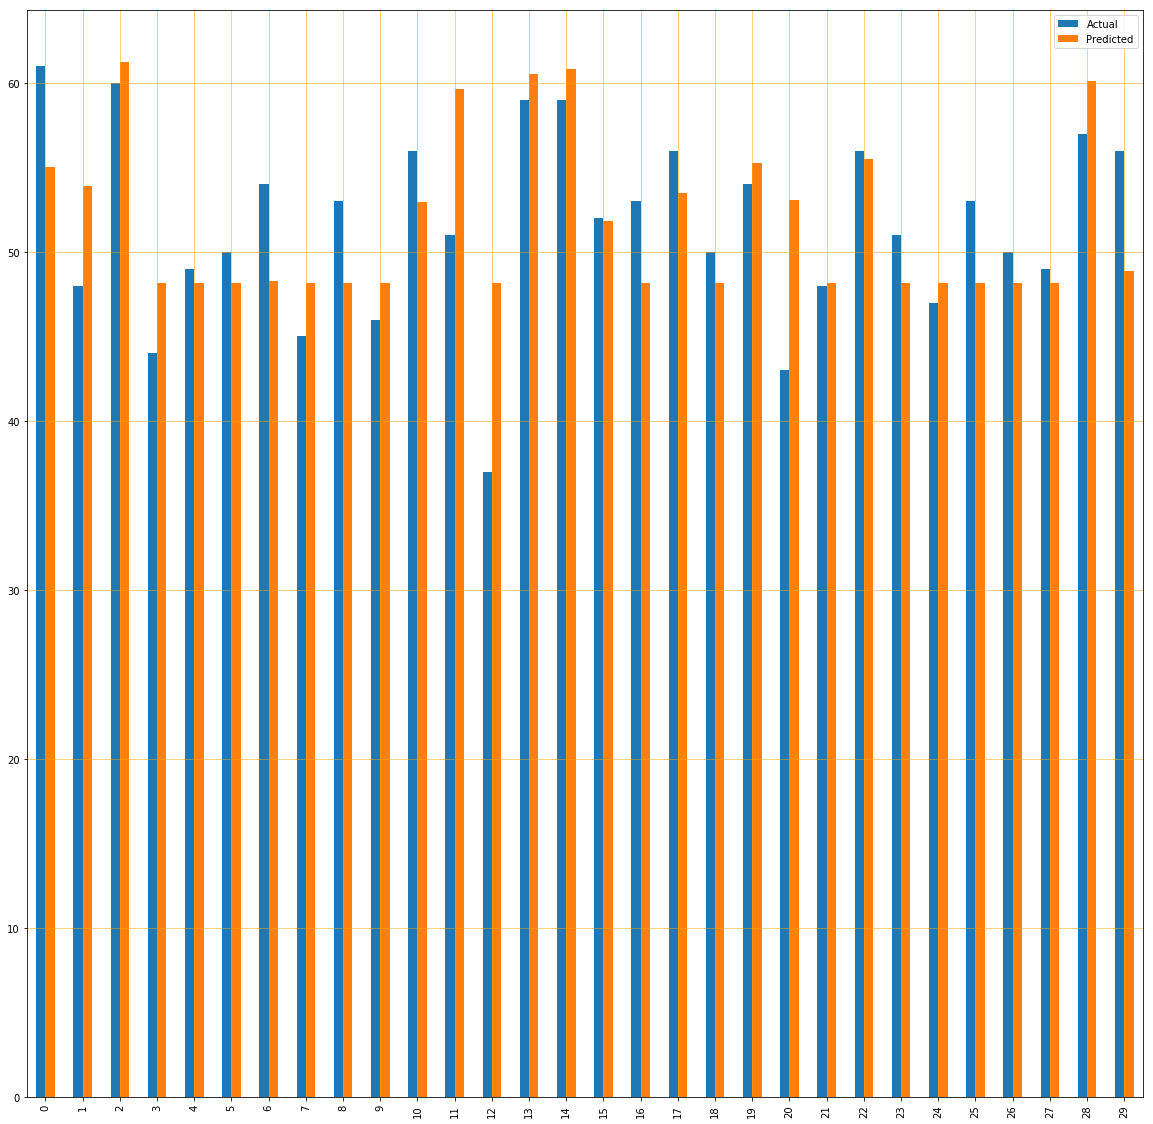

In [164]:
df1 = df.head(30)
df1.plot(kind='bar',figsize=(20,20))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='orange')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='orange')
plt.show()

Predicted percentage are quite close to actual one, which means that our algorithm is **well trained**.

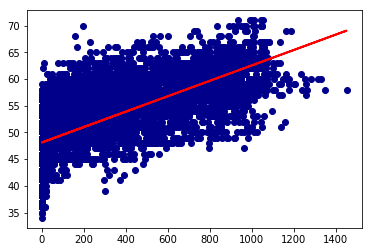

In [165]:
## Well, now it's time to plot our straight line ! 

plt.scatter(X_test, y_test,  color='darkblue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [166]:
## The final step is to evaluate the performance of the algorithm. 

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.3428145712086974
Mean Squared Error: 17.923509301005502
Root Mean Squared Error: 4.2336165746327925


You can see that the value of root mean squared error is 4.23, which is waaaaay above 10% of the mean value of the temperature (which is 45). 
This means that our algorithm is **not accurate**, but can still **be used for a first approach**.

### So what if simple linear regression doesn't work well ?

The best way to handle that is to choose the good amount of data and to train it well. Machine learning is all about that : **training your model and realize that the training has not been good**, that the predictions are not very accurate and start over again. Good luck !

___

## II - Multiple linear regression

After performing a simple linear regression, you might wonder how to proceed with more than two variables. Steps for this linear regression is quite the same as above but the evaluation is different. It can be used to **find out which factor has the highest impact of the predicted output and how different variables are related to each other**.

The **formula** for multiple Linear Regression is : 
$y_i = \beta_0 + \beta _1 x_{i1} + \beta _2 x_{i2} + ... + \beta _p x_{ip} + \epsilon$

\begin{aligned} &\textbf{where, for } i = n \textbf{ observations:}\\ &y_i=\text{dependent variable}\\ &x_i=\text{expanatory variables}\\ &\beta_0=\text{y-intercept (constant term)}\\ &\beta_p=\text{slope coefficients for each explanatory variable}\\ &\epsilon=\text{the model's error term (also known as the residuals)}\\ \end{aligned} 

The multiple regression model is based on the following assumptions:

- There is a **linear relationship** between the dependent variables and the independent variables.
- The independent variables are **not too highly correlated** with each other.
- yi observations are selected **independently and randomly** from the population.
- Residuals should be **normally distributed** with a mean of 0 and variance σ.


Take a deep breath. We won't directly use this formula, since we work with Scikit-Learn. However, it is always useful to **understand** what data you are manipulated, why and how.

In [167]:
# Now, let's start coding ! 
# Data from : https://www.kaggle.com/bappekim/air-pollution-in-seoul

In [168]:
dataset = pd.read_csv('/Users/Laurine/Documents/Python Scripts/IMAC2/Learn-computer-graphics/Linear-Regression/AirPollutionSeoul/Measurement_summary.csv')

In [169]:
# Let's see our data
dataset.describe()

,Station code,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
count,647511.000000,647511.000000,647511.000000,647511.000000,647511.000000,647511.000000,647511.000000,647511.000000,647511.000000
mean,113.000221,37.553484,126.989340,-0.001795,0.022519,0.017979,0.509197,43.708051,25.411995
std,7.211315,0.053273,0.078790,0.078832,0.115153,0.099308,0.405319,71.137342,43.924595
min,101.000000,37.452357,126.835151,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,107.000000,37.517528,126.927102,0.003000,0.016000,0.008000,0.300000,22.000000,11.000000
50%,113.000000,37.544962,127.004850,0.004000,0.025000,0.021000,0.500000,35.000000,19.000000
75%,119.000000,37.584848,127.047470,0.005000,0.038000,0.034000,0.600000,53.000000,31.000000
max,125.000000,37.658774,127.136792,3.736000,38.445000,33.600000,71.700000,3586.000000,6256.000000


In [170]:
# Same as for the simple linear regression, we need to divide our data into attributes and labels. 
# X variable contains all the attributes/features and y variable contains labels.
# Let's say we want to predict the NO2

X = dataset[['Latitude','Longitude', 'SO2','O3', 'CO', 'PM10','PM2.5']].values
y = dataset['NO2'].values

C:\Users\Laurine\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


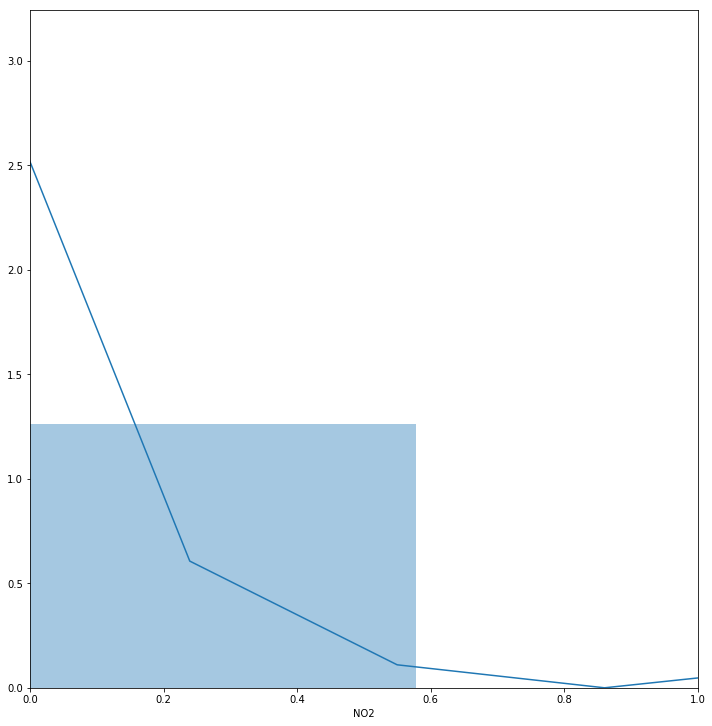

In [171]:
# We need to check the average value of NO2

plt.figure(figsize=(10,10))
plt.xlim((0,1))
plt.tight_layout()
seabornInstance.distplot(dataset['NO2'])

We see that the average of NO2 is something between 0.1 and 0.2

In [178]:
# Next, we split 70% of the data to the training set while 30% of the data to test set using below code.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [179]:
# Time to train our model ! 
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [180]:
# We want to see what coefficient our regression algorithm has chosen
print('Latitude','Longitude', 'SO2','O3', 'CO', 'PM10','PM2.5')
print(regressor.coef_)

Latitude Longitude SO2 O3 CO PM10 PM2.5
[-5.63239684e-02  1.01338366e-02  2.52565384e-01  7.52547726e-01
  2.02347868e-02  1.35922634e-05  3.33477562e-05]


A unit increase in “Latitude“ results in a decrease of : $-5.6 * 10^-2$ units in the NO2.

In [181]:
# Time to make our prediction : 
y_pred = regressor.predict(X_test)

In [182]:
# We need to check the difference between the actual value and the predicted one 
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)

df1.plot(kind='bar',figsize=(10,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

Our model is quite bad at predicting but it could be worse. Remember : machine learning, once again, is all about **training and testing your model.**

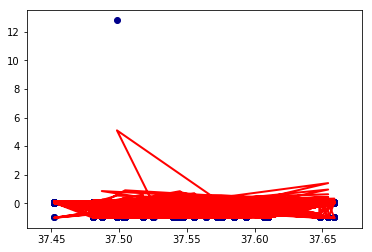

In [183]:
## Well, now it's time to plot our lines ! 

plt.scatter(X_test[:,0], y_test, color='darkblue')
plt.plot(X_test[:,0], y_pred, color='red', linewidth=2)
plt.show()

Well it is kinda chaotic since we have multiple variables but you can see that our lines cover our data well.

In [184]:
# It's time to evaluate our algorithm ! 
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.01950224842895457
Mean Squared Error: 0.0013053866895743607
Root Mean Squared Error: 0.03613013547683375


Well actually the root mean squared error is 0.04. The mean value is something in between 0.1 and 0.2. It is a bit more than 10% of this range value but it is still very good ! We can make good predictions.

### So what if multiple linear regression doesn't work well ?

Maybe you need more data ? Maybe you thought that your data had a linear relation but it is not the case ? Maybe your training failed at some point ?

There is a lot of side-effect with machine learning. Remember : training and testing your algorithm is the best thing to do.

___

## Conclusion

Congrats ! You've learn one of the most fundamental machine learning algorithms (thanks to Scikit-learn). 